# Form Recognition in Spark-OCR fine-tuning

Set license and AWS keys

In [ ]:
## Install spark-ocr python packge
Need to specify:
- secret
- license
- aws credentials

In [ ]:
secret = ""
license = ""
version = secret.split("-")[0]
spark_ocr_jar_path = "../../../target/scala-2.12/"

import os
if license:
    os.environ['JSL_OCR_LICENSE'] = license

## Install deps 

In [ ]:
!pip install -U --no-cache-dir gdown --pre

In [2]:
# downloading and unzipping the dataset
!rm -r ./llmv2_Alab_data
!gdown --id 1QqR19Wa2VCklL69WZOFkwZyeeo5yjyQx
!unzip "DS.zip" -d ./llmv2_Alab_data

# small dataset
# !rm -r /content/llmv2_Alab_data
# !gdown --id 1W-k-KoFIFpb9cRbVzwECHppg1sFzVjNK
# !unzip "/content/new DS.zip" -d /content/llmv2_Alab_data

# Separating the inference image
!mkdir test
!mv ./llmv2_Alab_data/images/63-1651494444_0.png ./test/63-1651494444_0.png

/home/jose/.local/lib/python3.7/site-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1QqR19Wa2VCklL69WZOFkwZyeeo5yjyQx
To: /home/jose/spark-ocr/workshop/jupyter/FormRecognition/DS.zip
100%|██████████████████████████████████████| 47.8M/47.8M [00:03<00:00, 12.2MB/s]
Archive:  DS.zip
   creating: ./llmv2_Alab_data/images/
  inflating: ./llmv2_Alab_data/result.json  
  inflating: ./llmv2_Alab_data/images/100-1651494444_0.png  
  inflating: ./llmv2_Alab_data/images/51-1651494444_0.png  
  inflating: ./llmv2_Alab_data/images/34-1651494444_0.png  
  inflating: ./llmv2_Alab_data/images/75-1651494444_1.png  
  inflating: ./llmv2_Alab_data/images/62-1651494444_1.png  
  inflating: ./llmv2_Alab_data/images/18-1651494444_0.png  
  inflating: ./llmv2_Alab_data/images/24-1651494444_0.png  
  inflating: ./

  inflating: ./llmv2_Alab_data/images/35-1651494444_0.png  
  inflating: ./llmv2_Alab_data/images/22-1651494444_0.png  
  inflating: ./llmv2_Alab_data/images/25-1651494444_1.png  
  inflating: ./llmv2_Alab_data/images/88-1651494444_0.png  
  inflating: ./llmv2_Alab_data/images/14-1651494444_1.png  
  inflating: ./llmv2_Alab_data/images/77-1651494444_1.png  
  inflating: ./llmv2_Alab_data/images/40-1651494444_1.png  
  inflating: ./llmv2_Alab_data/images/13-1651494444_2.png  
  inflating: ./llmv2_Alab_data/images/54-1651494444_0.png  
  inflating: ./llmv2_Alab_data/images/31-1651494444_0.png  
  inflating: ./llmv2_Alab_data/images/23-1651494444_2.png  
  inflating: ./llmv2_Alab_data/images/56-1651494444_0.png  
  inflating: ./llmv2_Alab_data/images/19-1651494444_1.png  
  inflating: ./llmv2_Alab_data/images/4-1651494444_0.png  
  inflating: ./llmv2_Alab_data/images/5-1651494444_0.png  
  inflating: ./llmv2_Alab_data/images/28-1651494444_1.png  
  inflating: ./llmv2_Alab_data/images/43-1

In [3]:
# Installing Dependencies
! python3.7 -m pip install 'git+https://github.com/facebookresearch/detectron2.git'
! python3.7 -m pip install datasets==1.18.2

! python3.7 -m pip uninstall numpy -y
! python3.7 -m pip install transformers==4.16.2

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-x23h_d9s
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-x23h_d9s
  Resolved https://github.com/facebookresearch/detectron2.git to commit e091a07ef573915056f8c2191b774aad0e38d09c
  Preparing metadata (setup.py) ... done
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.2/829.2 KB 6.9 MB/s eta 0:00:00m eta 0:00:010:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.7/74.7 KB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.1/151.1 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.0/131.0 KB 11.2 M

  Created wheel for detectron2: filename=detectron2-0.6-cp37-cp37m-linux_x86_64.whl size=5528329 sha256=c37260ada192026d6d106cee6bb7a6f949aea6583e17030fed364ea00efaef09
  Stored in directory: /tmp/pip-ephem-wheel-cache-3_zm7itt/wheels/07/dc/32/0322cb484dbefab8b9366bfedbaff5060ac7d149d69c27ca5d
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220512-py3-none-any.whl size=61288 sha256=5112b7ae3d3a15110ea69094582876ae09a231427972368e311ec14dcd800e17
  Stored in directory: /home/jose/.cache/pip/wheels/68/20/f9/a11a0dd63f4c13678b2a5ec488e48078756505c7777b75b29e
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=8879b873c3cc51385be4341b33ec58f550000eb5eb9425bbb9f7d0cdaf31f17b
  Stored in directory: /home/jose/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built detectron2 fvcore future
  Attempting uninstall: importlib-resources
    Found existing installation: importlib-resources 5.4.0
    Uninstalling im

You should consider upgrading via the '/usr/bin/python3.7 -m pip install --upgrade pip' command.
Found existing installation: numpy 1.21.6
Uninstalling numpy-1.21.6:
  Successfully uninstalled numpy-1.21.6
Defaulting to user installation because normal site-packages is not writeable
  Using cached transformers-4.16.2-py3-none-any.whl (3.5 MB)
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: transformers
    Found existing installation: transformers 4.17.0
    Uninstalling transformers-4.17.0:
      Successfully uninstalled transformers-4.17.0
You should consider upgrading via the '/usr/bin/python3.7 -m pip install --upgrade pip' command.


## Start Spark session with Spark OCR

In [1]:
license = ""

import os
os.environ['JSL_OCR_LICENSE'] = license

from sparkocr import start
from pyspark import SparkConf

spark_ocr_jar_path = "../../../target/scala-2.12/"
spark = start(jar_path = spark_ocr_jar_path)

# (only required for colab in some weird situations)
# spark._jvm.System.loadLibrary("opencv_java320")

# !find / -name *opencv_java*
# !ln -s /usr/lib/jni/libopencv_java320.so /usr/lib/jni/libopencv_java.so

Spark version: 3.0.2
Spark NLP version: 3.4.4
Spark OCR version: 3.12.1rc3



## Read image with form

In [2]:
%%time
from sparkocr.transformers.readers.alab_readers import AlabReaders

pyspark_dataframe = AlabReaders().dataLabeler(spark,
                                              "./llmv2_Alab_data/result.json",
                                              "./llmv2_Alab_data/images"
                                              ).cache()


CPU times: user 1.29 s, sys: 323 ms, total: 1.61 s
Wall time: 6.52 s


## Define pipeline for predict

In [3]:
from pyspark.ml import PipelineModel
from sparkocr.enums import *
from sparkocr.transformers import *
from sparkocr.transformers.ner import *
from sparkocr.transformers.tokenizer.hocr_tokenizer import HocrTokenizer
from sparkocr.utils import display_images_horizontal


binary_to_image = BinaryToImage() \
    .setOutputCol("image") \
    .setImageType(ImageType.TYPE_3BYTE_BGR)

img_to_hocr = ImageToHocr() \
    .setInputCol("image") \
    .setOutputCol("hocr") \
    .setIgnoreResolution(False) \
    .setOcrParams(["preserve_interword_spaces=0"])

tokenizer = HocrTokenizer() \
    .setInputCol("hocr") \
    .setOutputCol("token")


## Prepare train dataset (using predict results as training data)

In [4]:
import gc
gc.collect()

173

## Define VisualDocumentNerV21 for finetuning

* load model
* difine params of training

In [5]:
doc_ner_fine_tuned = VisualDocumentNerV21()\
            .loadHugingFaceModel("nielsr/layoutlmv2-finetuned-funsd", spark) \
            .setInputCols(["token", "image"]) \
            .setOutputCol("entities") \
            .setWhiteList( ['Diagnosis-B',
                            'Diagnosis-I',
                            'Drug-B',
                            'Drug-I',
                            'Symptom-B',
                            'Symptom-I',
                            'others'])\
            .setLabels(['Diagnosis-B',
                            'Diagnosis-I',
                            'Drug-B',
                            'Drug-I',
                            'Symptom-B',
                            'Symptom-I',
                            'others'])\
            .setbatchSize(4) \
            .setShuffleBatchTraining(True) \
            .setnumTrainEpochs(15)\
            .setImageSize(224)

### Pre-Training Inference

In [6]:
draw_annotations = ImageDrawAnnotations() \
            .setInputCol("image") \
            .setInputChunksCol("entities") \
            .setOutputCol("image_with_annotations") \
            .setFilledRect(False) \
            .setFontSize(14) \
            .setRectColor(Color.red) #\
            # .setColorMap(
            # {"other": Color.pink, "b-header": Color.yellow, "i-header": Color.yellow, "b-question": Color.blue,
            #  "i-question": Color.blue, "b-answer": Color.green, "i-answer": Color.green})

pipeline_predict = PipelineModel(stages=[
    binary_to_image,
    img_to_hocr,
    tokenizer,
    doc_ner_fine_tuned,
    draw_annotations
])


    Image #0:
    Origin: file:/home/jose/spark-ocr/workshop/jupyter/FormRecognition/test/63-1651494444_0.png
    Resolution: 0 dpi
    Width: 2550 px
    Height: 3299 px
    Mode: ImageType.TYPE_3BYTE_BGR
    Number of channels: 3


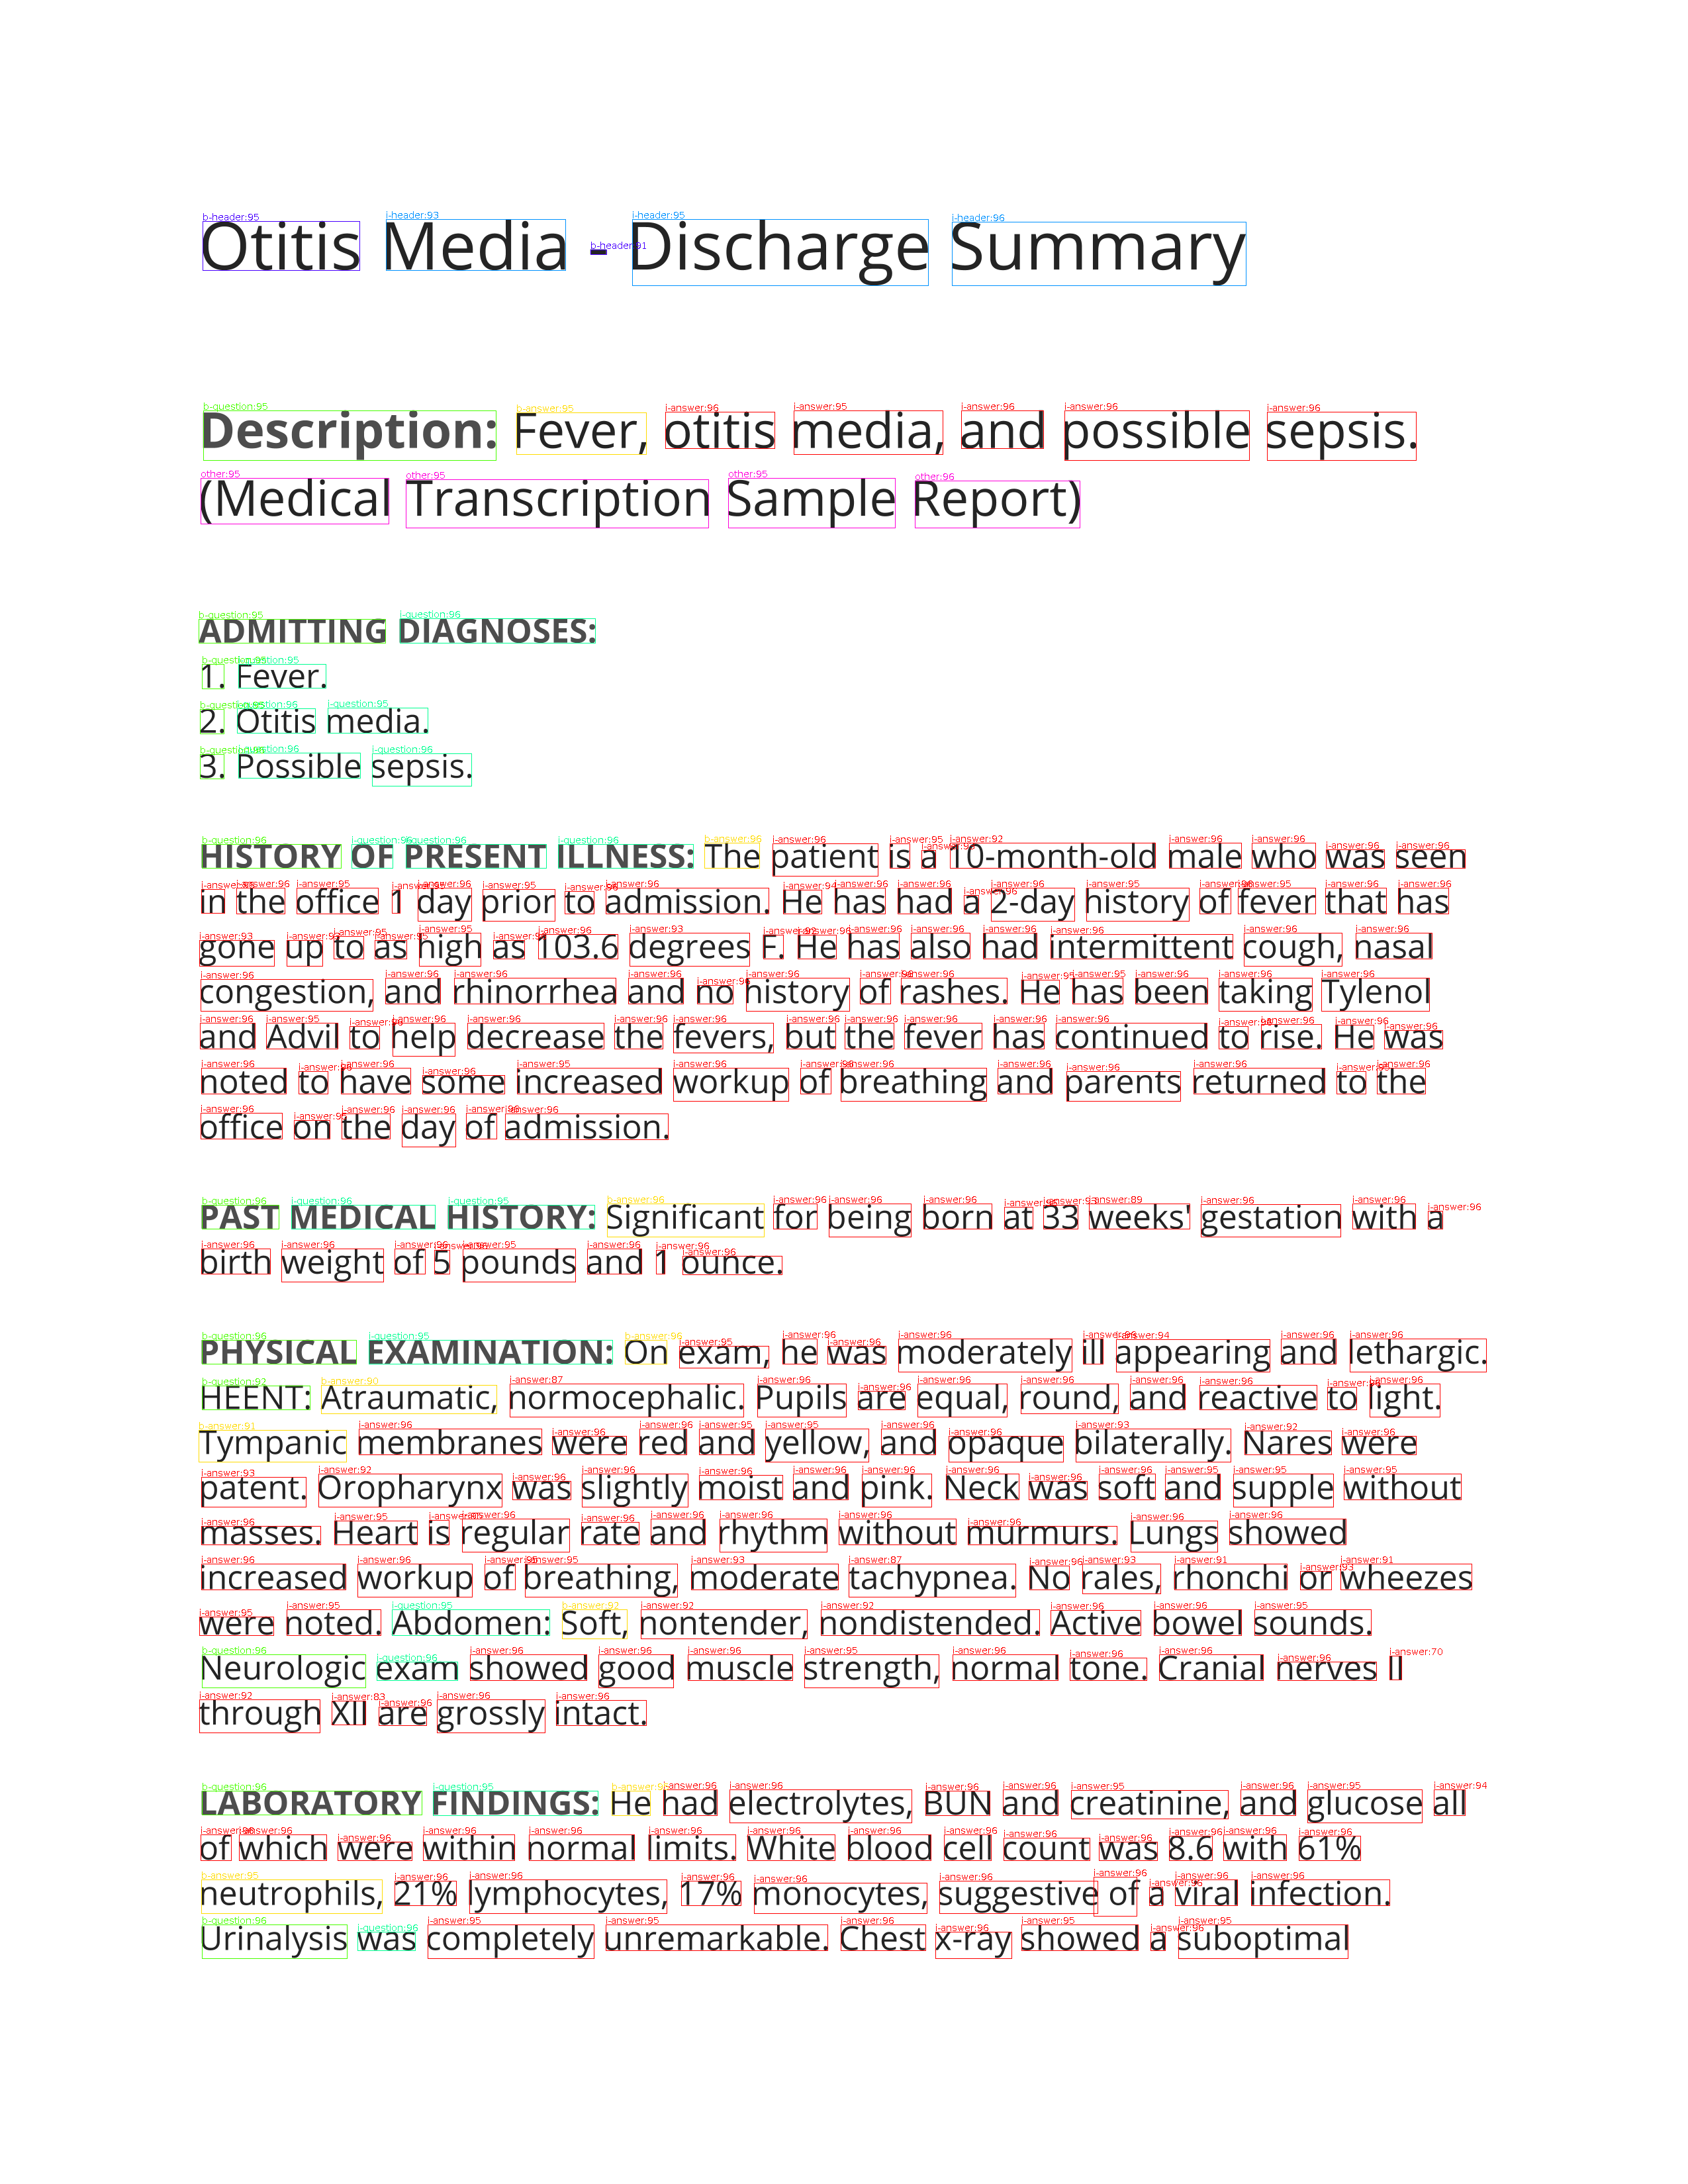

In [10]:
from sparkocr.utils import display_images_horizontal

from sparkocr.utils import display_images

  
bin_df = spark.read.format("binaryFile").load("./test")
results = pipeline_predict.transform(bin_df)

display_images(results, "image_with_annotations")


## Fit the model

In [11]:
%%time
ner_fit_model = doc_ner_fine_tuned.fit(pyspark_dataframe)


RuntimeError: CUDA out of memory. Tried to allocate 16.00 MiB (GPU 0; 3.95 GiB total capacity; 405.26 MiB already allocated; 88.12 MiB free; 416.00 MiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

## Call finetuned model for predict

In [ ]:
pipeline_predict = PipelineModel(stages=[
    binary_to_image,
    img_to_hocr,
    tokenizer,
    ner_fit_model,
    draw_annotations
])

### Post Training Inference


    Image #0:
    Origin: file:/content/test/63-1651494444_0.png
    Resolution: 0 dpi
    Width: 2550 px
    Height: 3299 px
    Mode: ImageType.TYPE_3BYTE_BGR
    Number of channels: 3


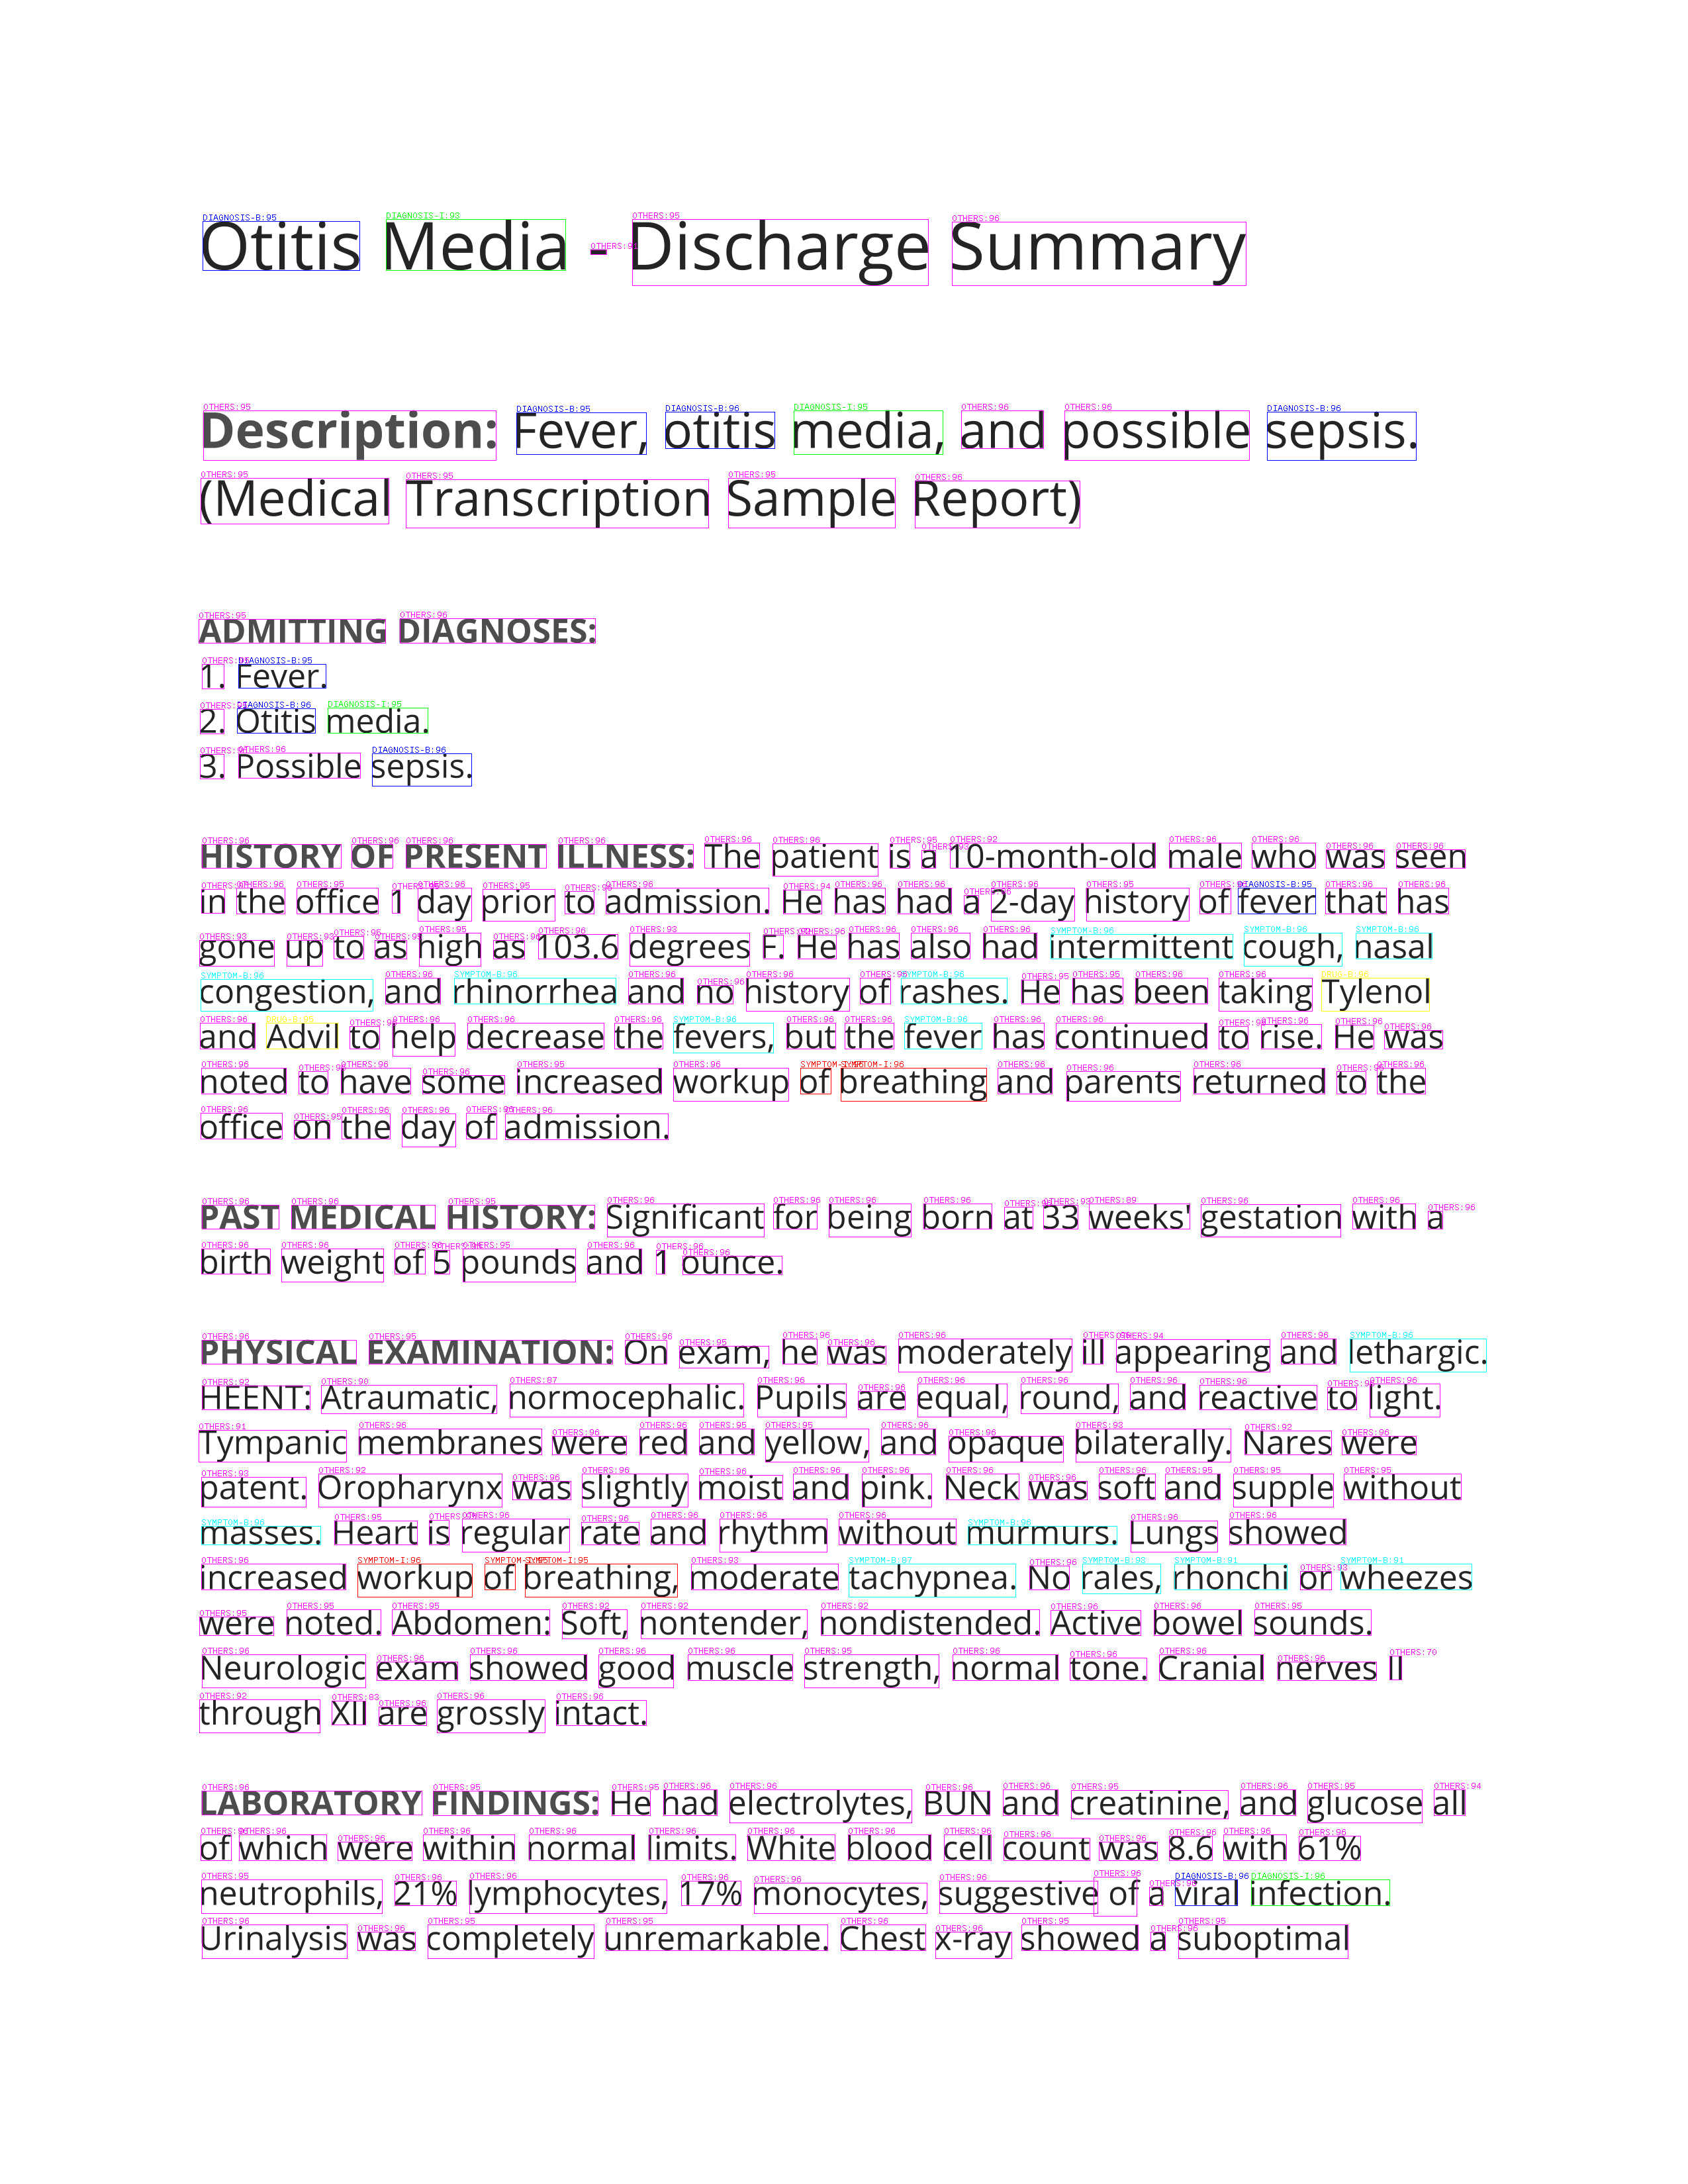

In [ ]:
from sparkocr.utils import display_images_horizontal

from sparkocr.utils import display_images

  
bin_df = spark.read.format("binaryFile").load("/content/test")
bin_df = bin_df
results = pipeline_predict.transform(bin_df)

display_images(results, "image_with_annotations")
